# **Random forest**

**Problem Statement:**

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [108]:
data = pd.read_csv("/content/Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


**Data Preprocessing**

In [109]:
data.shape

(400, 11)

In [110]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [111]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [112]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [113]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

NO Missing values and NO out liers in Dataset.




### Conversion of Target variable Sales into Categorical Variable

In [114]:
len(data.Sales.unique())

336

In [115]:
data.Sales.values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [116]:
data['Sales'] =pd.cut(np.array([9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,  4.96,  4.47,  8.41,  6.5 ,  9.54,  7.62,  3.67,
        6.44,  5.17,  6.52, 10.27, 12.3 ,  6.03,  6.53,  7.44,  0.53,
        9.09,  8.77,  3.9 , 10.51,  7.56, 11.48, 10.49, 10.77,  7.64,
        5.93,  6.89,  7.71,  7.49, 10.21, 12.53,  9.32,  4.67,  2.93,
        3.63,  5.68,  8.22,  0.37,  6.71,  6.71,  7.3 , 11.48,  8.01,
       12.49,  9.03,  6.38,  0.  ,  7.54,  5.61, 10.48, 10.66,  7.78,
        4.94,  7.43,  4.74,  5.32,  9.95, 10.07,  8.68,  6.03,  8.07,
       12.11,  8.79,  6.67,  7.56, 13.28,  7.23,  4.19,  4.1 ,  2.52,
        3.62,  6.42,  5.56,  5.94,  4.1 ,  2.05,  8.74,  5.68,  4.97,
        8.19,  7.78,  3.02,  4.36,  9.39, 12.04,  8.23,  4.83,  2.34,
        5.73,  4.34,  9.7 , 10.62, 10.59,  6.43,  7.49,  3.45,  4.1 ,
        6.68,  7.8 ,  8.69,  5.4 , 11.19,  5.16,  8.09, 13.14,  8.65,
        9.43,  5.53,  9.32,  9.62,  7.36,  3.89, 10.31, 12.01,  4.68,
        7.82,  8.78, 10.  ,  6.9 ,  5.04,  5.36,  5.05,  9.16,  3.72,
        8.31,  5.64,  9.58,  7.71,  4.2 ,  8.67,  3.47,  5.12,  7.67,
        5.71,  6.37,  7.77,  6.95,  5.31,  9.1 ,  5.83,  6.53,  5.01,
       11.99,  4.55, 12.98, 10.04,  7.22,  6.67,  6.93,  7.8 ,  7.22,
        3.42,  2.86, 11.19,  7.74,  5.36,  6.97,  7.6 ,  7.53,  6.88,
        6.98,  8.75,  9.49,  6.64, 11.82, 11.28, 12.66,  4.21,  8.21,
        3.07, 10.98,  9.4 ,  8.57,  7.41,  5.28, 10.01, 11.93,  8.03,
        4.78,  5.9 ,  9.24, 11.18,  9.53,  6.15,  6.8 ,  9.33,  7.72,
        6.39, 15.63,  6.41, 10.08,  6.97,  5.86,  7.52,  9.16, 10.36,
        2.66, 11.7 ,  4.69,  6.23,  3.15, 11.27,  4.99, 10.1 ,  5.74,
        5.87,  7.63,  6.18,  5.17,  8.61,  5.97, 11.54,  7.5 ,  7.38,
        7.81,  5.99,  8.43,  4.81,  8.97,  6.88, 12.57,  9.32,  8.64,
       10.44, 13.44,  9.45,  5.3 ,  7.02,  3.58, 13.36,  4.17,  3.13,
        8.77,  8.68,  5.25, 10.26, 10.5 ,  6.53,  5.98, 14.37, 10.71,
       10.26,  7.68,  9.08,  7.8 ,  5.58,  9.44,  7.9 , 16.27,  6.81,
        6.11,  5.81,  9.64,  3.9 ,  4.95,  9.35, 12.85,  5.87,  5.32,
        8.67,  8.14,  8.44,  5.47,  6.1 ,  4.53,  5.57,  5.35, 12.57,
        6.14,  7.41,  5.94,  9.71]),3,labels=["Low","Medium","High"])

In [117]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


#### Convert target variable into binary

In [1]:
import pandas as pd

# Load your dataset into a DataFrame
data1 = pd.read_csv('/content/Company_Data.csv')  # Replace 'your_dataset.csv' with the actual file path

# Map non-numeric values to numeric values
data1['Sales'] = data1['Sales'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Define a threshold to classify sales as high or low
threshold = data1['Sales'].mean()  # You can choose any threshold based on your specific criteria

# Convert 'Sales' into a binary variable
data1['Sales_Binary'] = (data1['Sales'] > threshold).astype(int)

# Drop the original 'Sales' column if not needed
data1.drop('Sales', axis=1, inplace=True)

# Check the updated dataset
print(data1.head())


   CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   
3        117     100            4         466     97    Medium   55   
4        141      64            3         340    128       Bad   38   

   Education Urban   US  Sales_Binary  
0         17   Yes  Yes             0  
1         10   Yes  Yes             0  
2         12   Yes  Yes             0  
3         14   Yes  Yes             0  
4         13   Yes   No             0  


In [5]:
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Binary
0,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,111,48,16,260,83,Good,65,10,Yes,Yes,0
2,113,35,10,269,80,Medium,59,12,Yes,Yes,0
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,0
396,139,23,3,37,120,Medium,55,11,No,Yes,0
397,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,100,79,7,284,95,Bad,50,12,Yes,Yes,0


### Visulization

In [118]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
encoder1=LabelEncoder()
data['ShelveLoc'] =encoder1.fit_transform(data['ShelveLoc'])
data['Urban'] =encoder1.fit_transform(data['Urban'])
data['US'] =encoder1.fit_transform(data['US'])

In [119]:
data['Sales']

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

<Axes: xlabel='Sales', ylabel='count'>

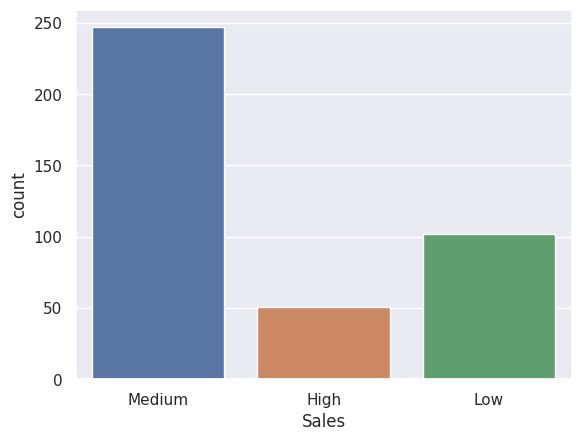

In [120]:
import pandas as pd
import seaborn as sns

# Assuming you have a DataFrame named 'data' with a column 'Sales'

# Convert the 'Sales' column to string data type
data['Sales'] = data['Sales'].astype(str)

# Plot the count of each category in a bar plot
sns.countplot(x='Sales', data=data)


<Axes: xlabel='CompPrice', ylabel='count'>

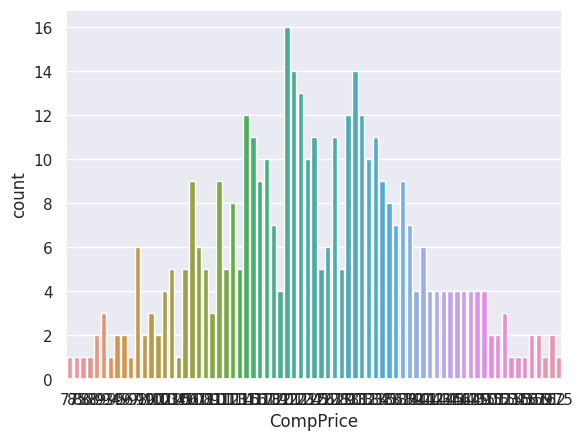

In [121]:
sns.countplot(x='CompPrice',data=data)

<Axes: xlabel='Price', ylabel='count'>

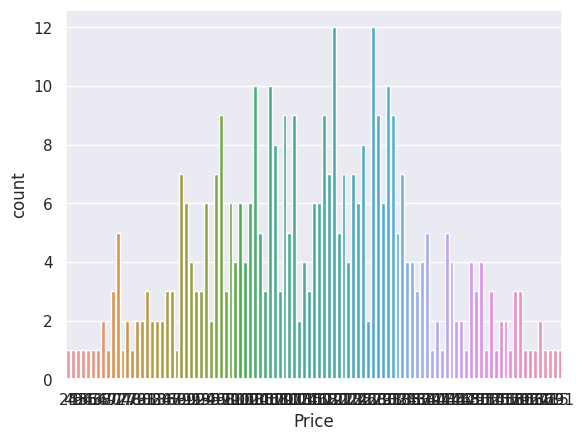

In [122]:
sns.countplot(x='Price',data=data)

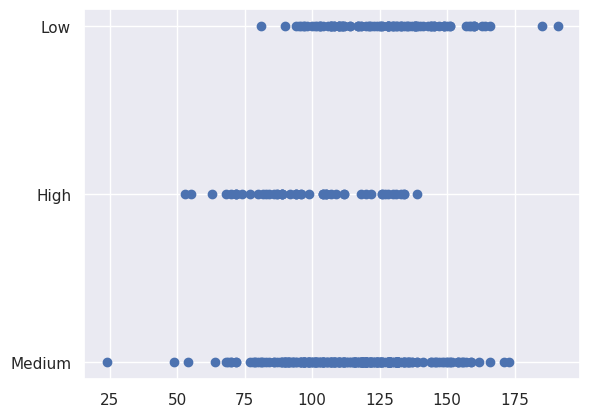

In [123]:
plt.scatter(x="Price",y="Sales",data =data)

### Checking the corealtion with in the data

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
data.corr()

<ipython-input-124-b9352d03e53e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000


(array([247.,   0.,   0.,   0.,   0.,  51.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

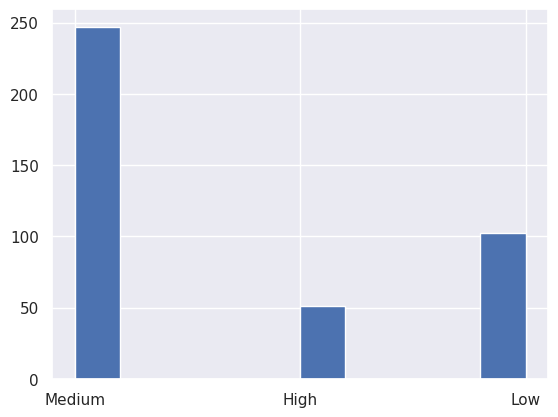

In [125]:
plt.hist(data['Sales'])

(array([41., 39., 39., 35., 32., 46., 45., 39., 38., 46.]),
 array([ 10. ,  59.9, 109.8, 159.7, 209.6, 259.5, 309.4, 359.3, 409.2,
        459.1, 509. ]),
 <BarContainer object of 10 artists>)

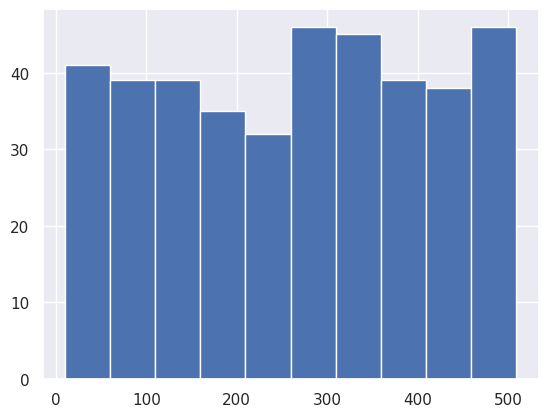

In [126]:
plt.hist(data['Population'])

(array([  1.,   4.,  14.,  36.,  91., 106.,  95.,  37.,  14.,   2.]),
 array([ 24. ,  40.7,  57.4,  74.1,  90.8, 107.5, 124.2, 140.9, 157.6,
        174.3, 191. ]),
 <BarContainer object of 10 artists>)

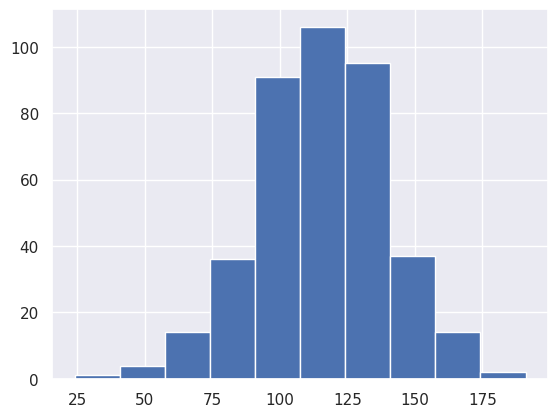

In [127]:
plt.hist(data['Price'])

(array([41., 45., 37., 32., 55., 46., 43., 38., 29., 34.]),
 array([ 21. ,  30.9,  40.8,  50.7,  60.6,  70.5,  80.4,  90.3, 100.2,
        110.1, 120. ]),
 <BarContainer object of 10 artists>)

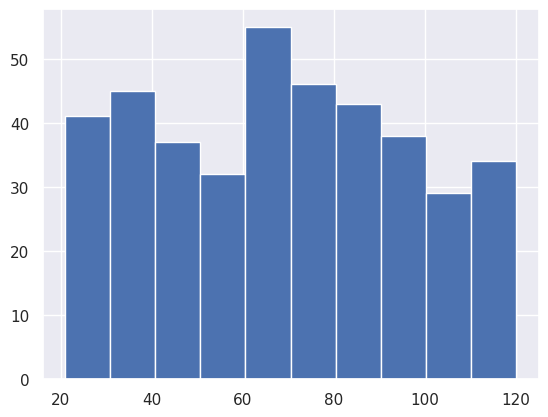

In [128]:
plt.hist(data['Income'])

(array([43., 32., 35., 38., 38., 41., 51., 35., 39., 48.]),
 array([25. , 30.5, 36. , 41.5, 47. , 52.5, 58. , 63.5, 69. , 74.5, 80. ]),
 <BarContainer object of 10 artists>)

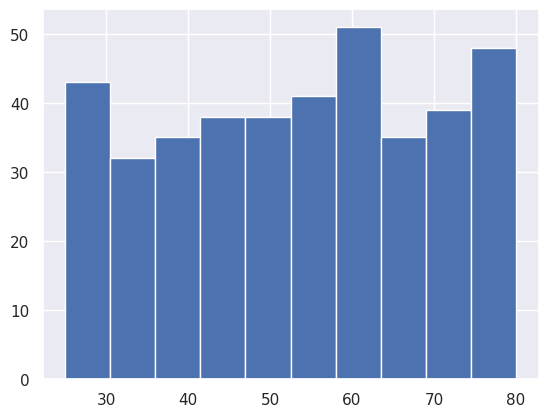

In [129]:
plt.hist(data['Age'])

(array([142.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 258.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

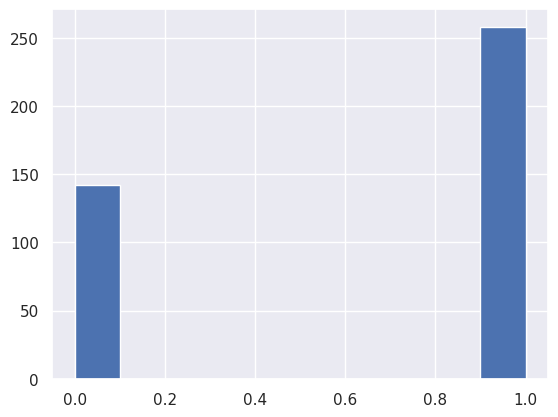

In [130]:
plt.hist(data['US'])

<Figure size 2000x2000 with 0 Axes>

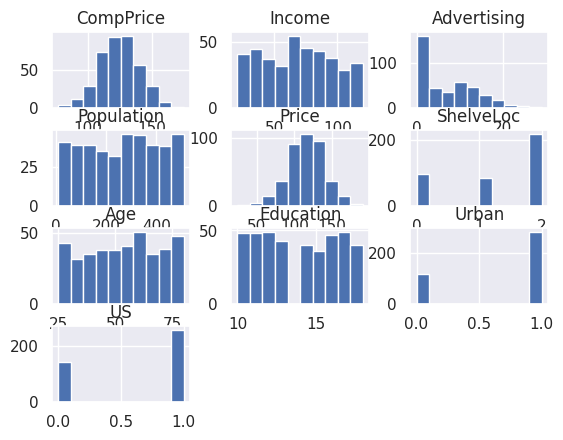

<Figure size 2000x2000 with 0 Axes>

In [131]:
data.hist()
plt.figure(figsize =(20,20))

<Figure size 2000x2000 with 0 Axes>

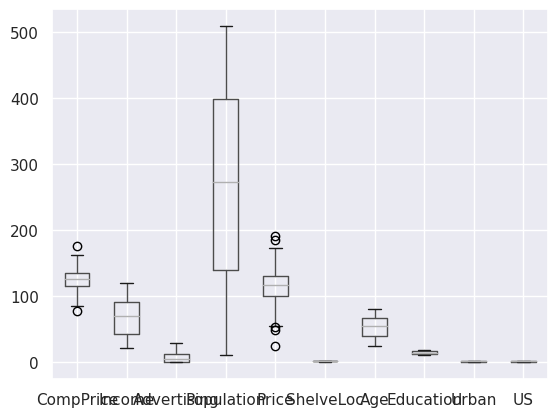

<Figure size 2000x2000 with 0 Axes>

In [132]:
data.boxplot()
plt.figure(figsize =(20,20))

<ipython-input-133-a7bcc677ebfa>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['Income'], fit=norm,kde=True)


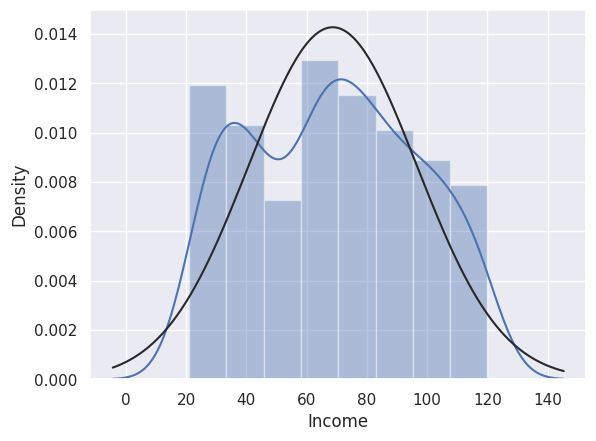

In [133]:
#Dist plot
from scipy.stats import norm
import seaborn as sns
sns.set_theme()
rk= sns.distplot(data['Income'], fit=norm,kde=True)

<ipython-input-134-85eff1dd621b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['Price'], fit=norm,kde=True)


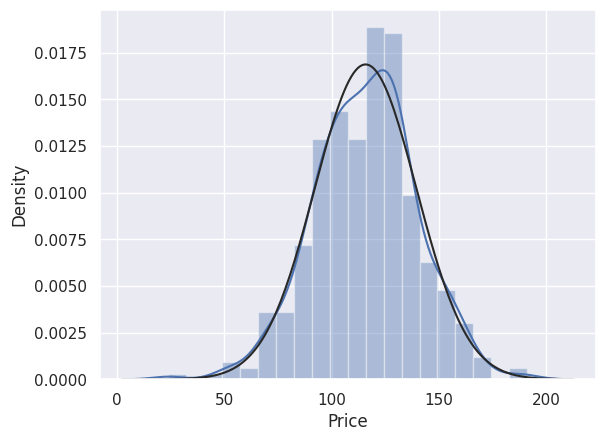

In [134]:
sns.set_theme()
rk= sns.distplot(data['Price'], fit=norm,kde=True)

<ipython-input-135-921b497cda16>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['Age'], fit=norm,kde=True)


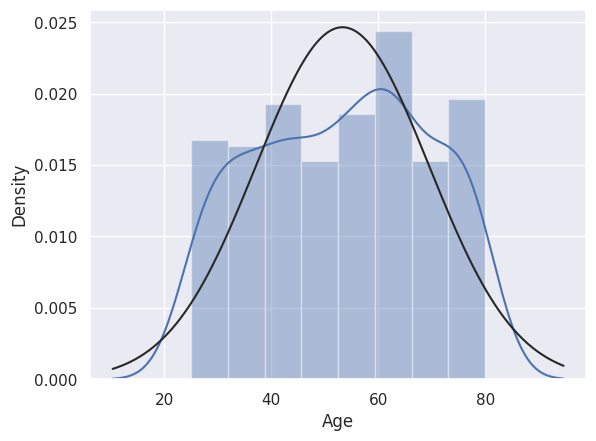

In [135]:
sns.set_theme()
rk= sns.distplot(data['Age'], fit=norm,kde=True)

<ipython-input-136-d0cbfac53c44>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['US'], fit=norm,kde=True)


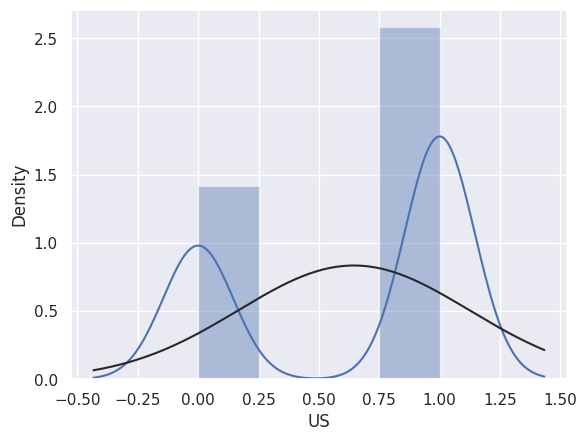

In [136]:
sns.set_theme()
rk= sns.distplot(data['US'], fit=norm,kde=True)

In [137]:
from sklearn.ensemble import BaggingClassifier

In [138]:
kfold1 =KFold(n_splits =10,shuffle =True,random_state=10)
model2=RandomForestClassifier(n_estimators =100,criterion ='entropy',max_features =3)
model3 =BaggingClassifier(base_estimator =model2,n_estimators =100,random_state =10)
results1 =cross_val_score(model3,X,y,cv=kfold1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [139]:
print(results1)

[0.7   0.625 0.7   0.75  0.725 0.8   0.575 0.675 0.65  0.7  ]


In [140]:
print(np.mean(results1))

0.6900000000000001


In [141]:
X=data.iloc[:,1:]
y=data['Sales']

In [142]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state= 10)

In [143]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
399,134,37,0,27,120,1,49,16,1,1
25,139,32,0,176,82,1,54,11,0,0
279,141,57,13,376,158,2,64,18,1,1
260,129,117,8,400,101,0,36,10,1,1
130,94,84,13,497,77,2,51,12,1,1
...,...,...,...,...,...,...,...,...,...,...
369,135,100,22,463,122,2,36,14,1,1
320,136,70,12,171,152,2,44,18,1,1
15,149,95,5,400,144,2,76,18,0,0
125,89,78,0,181,49,2,43,15,0,0


In [144]:
X_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
332,106,33,20,354,104,2,61,12,1,1
111,132,118,12,272,151,2,43,14,1,1
352,133,103,14,288,122,1,61,17,1,1
205,113,22,1,317,132,2,28,12,1,0
56,133,82,0,54,84,2,50,17,1,0
...,...,...,...,...,...,...,...,...,...,...
17,147,74,13,251,131,1,52,10,1,1
225,107,25,0,412,82,0,36,14,1,0
223,110,45,9,276,125,2,62,14,1,1
59,118,71,4,148,114,2,80,13,1,0


In [145]:
y_test

332    Medium
111    Medium
352      High
205    Medium
56       High
        ...  
17       High
225    Medium
223       Low
59        Low
114    Medium
Name: Sales, Length: 120, dtype: object

In [146]:
y_train

399    Medium
25       High
279       Low
260    Medium
130    Medium
        ...  
369    Medium
320    Medium
15     Medium
125    Medium
265       Low
Name: Sales, Length: 280, dtype: object

In [147]:
from sklearn.model_selection import cross_val_score

In [148]:
model=RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [149]:
y_pred

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High'

In [150]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.6583333333333333

In [151]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

41

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.50      0.06      0.11        17
         Low       0.52      0.44      0.48        25
      Medium       0.69      0.86      0.77        78

    accuracy                           0.66       120
   macro avg       0.57      0.45      0.45       120
weighted avg       0.63      0.66      0.61       120



In [153]:
kfold =KFold(n_splits=10,shuffle =True,random_state =None)
model1 =RandomForestClassifier(n_estimators=100,max_features =3)
results=cross_val_score(model1,X,y, cv =kfold)

In [154]:
print(results)

[0.8   0.75  0.575 0.725 0.65  0.675 0.825 0.675 0.7   0.675]


In [155]:
print(np.mean(results))

0.705


The average accuracy of cross_val_score is 0.72 % when we use the KFOLD model_selection